## Method

Define $\text{emb}_i$ to be the list of embeddings after the $i$th attention layer ($\text{emb}_0$ refers to the embeddings before attention). $\text{emb}_{i,j}$ is the embedding of the $j$th token after the $i$th attention layer.

My method was to cluster $\text{emb}_i$ with spectral clustering, with $k=5$ clusters and $\text{n neighbors}=15$.

Spectral clustering with $k=5$ takes the top $5$ eigenvectors (sorted by highest eigenvalue) $v_1, v_2, \ldots v_5$. Consider matrix $$M=\begin{bmatrix} v_1 & v_2 & v_3 & v_4 & v_5 \end{bmatrix},$$
which has one row corresponding to each token and $5$ elements in each row. 

The visualization was produced by clustering the rows of $M$ and applying PCA to reduce from $k=5$ to $2$ dimensions. The token labelings are from the original input tokens, not the decodings of the given layer.

(Note that there is a mislabeling in the visualization. #(attention layers = $i$) should be relabeled #(attention layers = $i-1$), as the first plot shows the embeddings before going through any attention layers.)

## Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

In [2]:
from collections import Counter

In [3]:
# file containing the embeddings
df = pd.read_csv('out-tinystories-cluster-spectral/30.csv')
df.head()

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,label0,label1,label2,label3,label4,label5,label6,label7,token
0,"[0.0006011072546243668, -0.06450191140174866, ...","[0.0006011072546243668, -0.06450191140174866, ...","[0.05809622257947922, -2.568804979324341, 0.52...","[0.6596587300300598, -3.904742479324341, 0.478...","[1.649893045425415, -4.921343803405762, -0.018...","[3.483633279800415, -5.443316459655762, -0.156...","[5.161367416381836, -6.427691459655762, -1.149...","[2.138679027557373, -2.8108208179473877, -0.71...",2,2,0,0,0,0,0,0,Once
1,"[0.0800330638885498, -0.0733233243227005, -0.0...","[0.0800330638885498, -0.0733233243227005, -0.0...","[1.5746619701385498, -2.0153398513793945, 1.10...","[2.81684947013855, -3.4176836013793945, 2.6757...","[3.71528697013855, -3.5358476638793945, 2.2391...","[4.968705177307129, -2.7848711013793945, 3.088...","[7.101517677307129, -3.3830156326293945, 3.358...","[2.550734281539917, -1.4745920896530151, 1.035...",2,2,0,0,0,0,0,0,upon
2,"[0.024861622601747513, -0.014501634985208511, ...","[0.024861622601747513, -0.014501634985208511, ...","[0.7040608525276184, -1.015966534614563, 0.719...","[1.2450764179229736, -1.892919659614563, 1.208...","[1.7831623554229736, -1.5140132904052734, 1.18...","[3.8212482929229736, -1.0208492279052734, 1.17...","[6.3407793045043945, -1.6346187591552734, 1.55...","[3.1453158855438232, -0.9155108332633972, 1.26...",2,2,0,0,0,0,0,0,a
3,"[0.10966695100069046, -0.03712926432490349, 0....","[0.10966695100069046, -0.03712926432490349, 0....","[1.0232411623001099, -2.0177199840545654, -0.0...","[1.6355458498001099, -3.2696731090545654, 0.18...","[2.2859363555908203, -3.8468215465545654, -0.4...","[3.4499988555908203, -4.4112749099731445, -1.3...","[5.08671760559082, -6.3676958084106445, -2.469...","[2.135122776031494, -2.6436424255371094, -0.89...",2,2,0,0,0,0,0,0,time
4,"[0.053735148161649704, -0.08522026240825653, -...","[0.053735148161649704, -0.08522026240825653, -...","[0.8315366506576538, -0.9365386366844177, -0.8...","[1.2558530569076538, -1.2822418212890625, -1.5...","[1.4413999319076538, -1.1259918212890625, -2.3...","[1.0122007131576538, -0.3847808837890625, -3.4...","[1.3354429006576538, -1.6142730712890625, -4.0...","[0.25139617919921875, -0.621404230594635, -1.7...",2,2,0,0,0,0,0,0,there


In [5]:
def print_clusters(k, labels, df):
    clusters = {
        i : [] for i in range(k)
    }

    for label, token in zip(labels, df["token"]):
        clusters[label].append(token.lower())

    for i in range(k):
        token_counts = Counter(clusters[i])

        df2 = pd.DataFrame(token_counts.most_common(), columns = ["Token", "Count"])

        display(df2)

/var/folders/sn/m1jt_qvx06db6gq859hkndh00000gn/T/ipykernel_72285/110349091.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', k)  # Use the same colormap as for scatter plot
/var/folders/sn/m1jt_qvx06db6gq859hkndh00000gn/T/ipykernel_72285/110349091.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', k)  # Use the same colormap as for scatter plot
/var/folders/sn/m1jt_qvx06db6gq859hkndh00000gn/T/ipykernel_72285/110349091.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` o

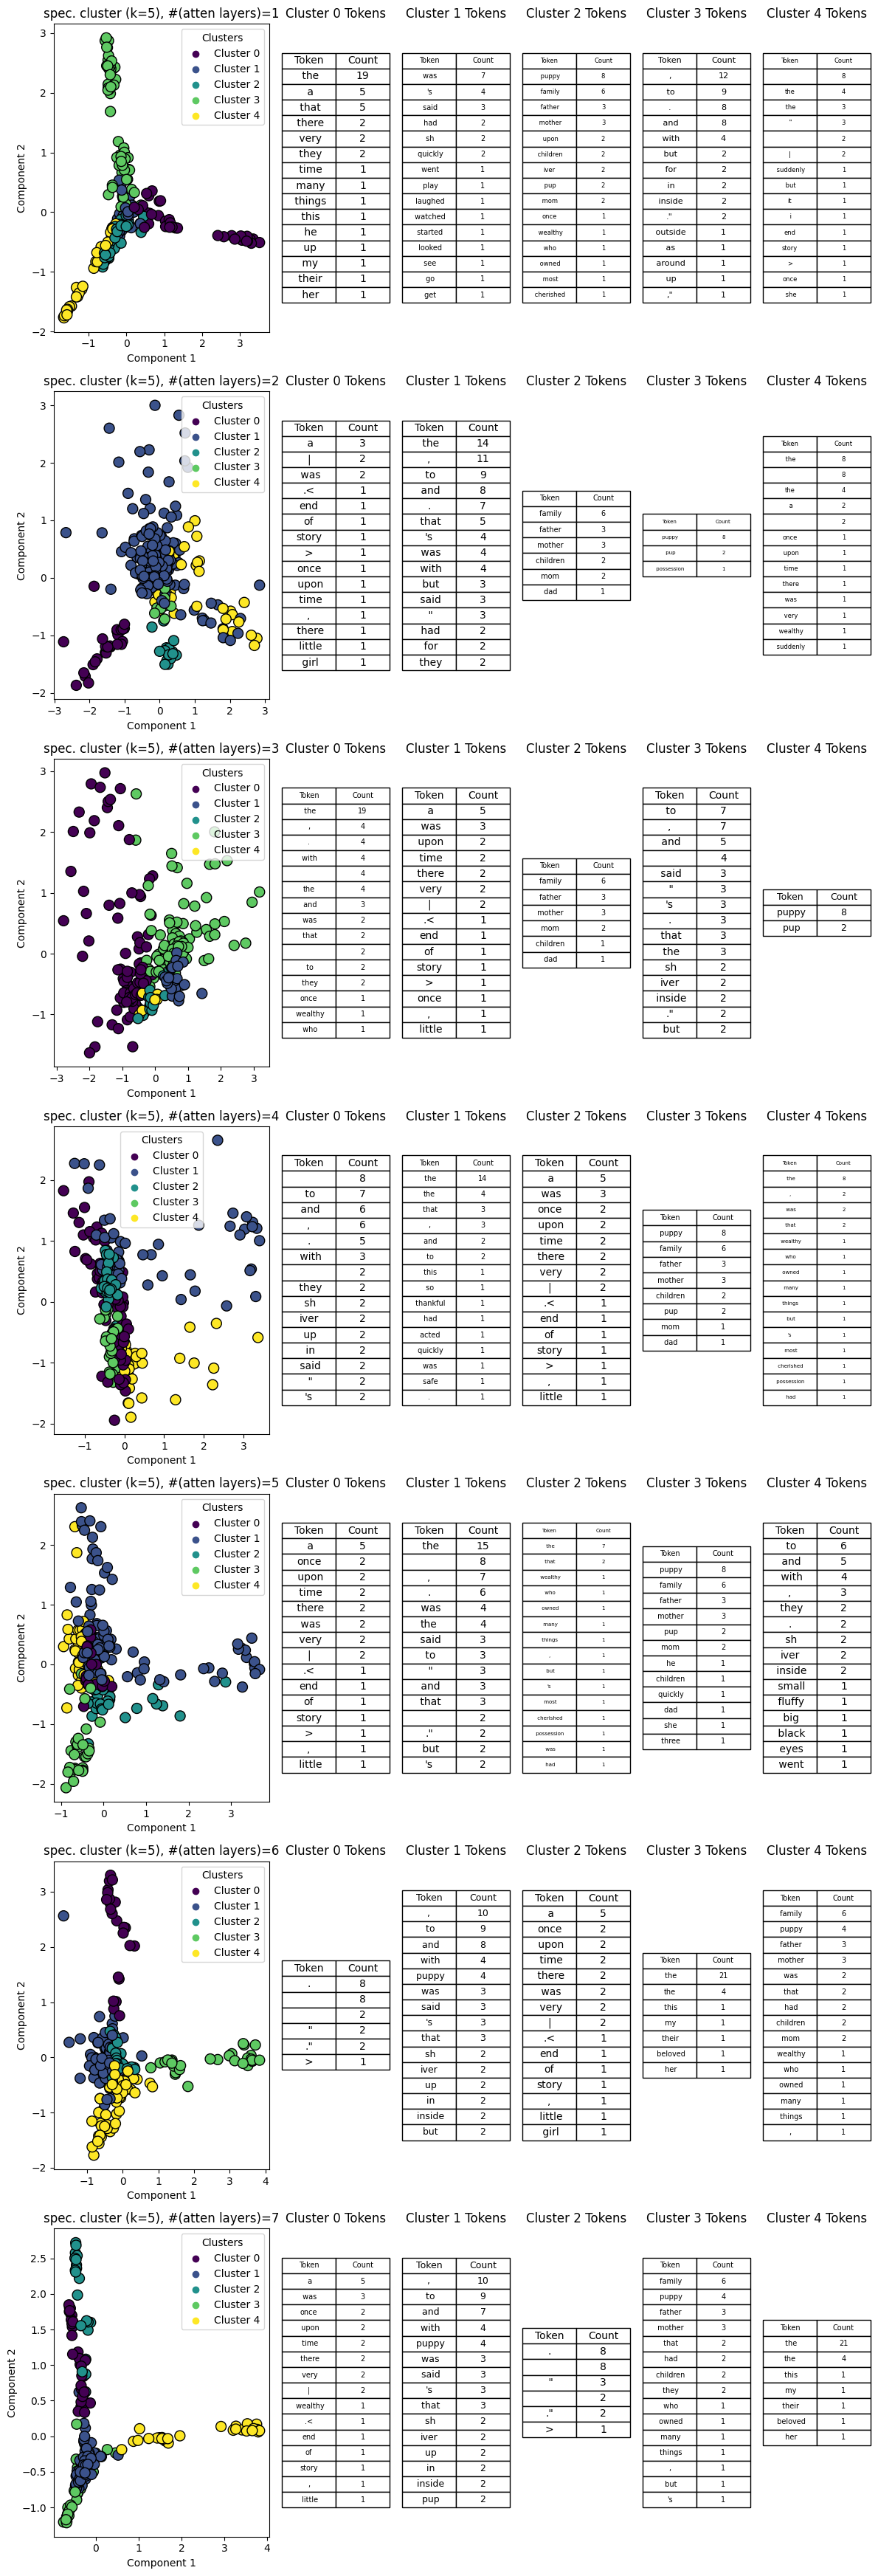

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from matplotlib import cm
import pandas as pd
from collections import Counter

k = 5
time_points = 7

# Create a single figure to hold all the subplots
fig, axes = plt.subplots(time_points, k + 1, figsize=(12, time_points * 5), gridspec_kw={'width_ratios': [3, ] + [1.5, ] * k})

# Loop over time points
for t in range(1, time_points + 1):
    embeddings = [eval(emb) for emb in df[f'emb{t}']]
    spectral_clustering = SpectralClustering(
        n_clusters=k,
        affinity='nearest_neighbors',
        n_neighbors=15,
        random_state=42
    )

    labels = spectral_clustering.fit_predict(embeddings)
    
    embedding = spectral_clustering.affinity_matrix_

    clusters = {
            i : [] for i in range(k)
        }

    for label, token in zip(labels, df["token"]):
        clusters[label].append(token.lower())

    # If k > 2, reduce the dimensionality of the embedding to 2D (for visualization)
    if k > 2:
        pca = PCA(n_components=2)
        embedding = pca.fit_transform(embedding)

    # Scatter plot of clusters based on the spectral embedding (or PCA-reduced)
    scatter = axes[t-1, 0].scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=100, edgecolors='k')

    # Set the plot title and axis labels
    axes[t-1, 0].set_title(f"spec. cluster (k={k}), #(atten layers)={t}")
    axes[t-1, 0].set_xlabel("Component 1")
    axes[t-1, 0].set_ylabel("Component 2")

    # Add color legend for the clusters
    cmap = cm.get_cmap('viridis', k)  # Use the same colormap as for scatter plot
    for cluster_id in np.unique(labels):
        axes[t-1, 0].scatter([], [], c=[cmap(cluster_id / k)], label=f'Cluster {cluster_id}', marker='o')

    axes[t-1, 0].legend(title="Clusters", loc="best")

    # Display token counts for each cluster as tables
    for i, (cluster_id, tokens) in enumerate(sorted(clusters.items())):
        token_counts = Counter(tokens)
        df3 = pd.DataFrame(token_counts.most_common(), columns=["Token", "Count"]).head(15)
        
        # Display the table as text within the plot
        axes[t-1, i + 1].axis("off")  # Remove axis
        axes[t-1, i + 1].table(
            cellText=df3.values,
            colLabels=df3.columns,
            cellLoc='center',
            loc='center',
        )
        axes[t-1, i + 1].set_title(f"Cluster {cluster_id} Tokens")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
